# DATA SCIENCE - LOGISTIC REGRESSION
## Aufgabe Do the exercise in the Regression LE which is to discover if 4.8,2.5,5.3,2.4 is an iris virginica.

**Lösungsweg:** Zur Bearbeitung habe ich das vorhandene Jupyter-Notebook verwendet und angepasst. 

Original provided by the author in GitHub: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb
from the exceptional book: _Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299_

Let’s try to build a classifier to detect the Iris-__Virginica__ type based only on the petal width feature.

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

## Hierzu habe ich mir das Dataset genauer angeschaut:

- Insgesamt enthält das Dataset 150 Werte - jeweils 50 pro Klasse
- Die drei Klassen sind Iris-Setosa (0), Iris-Versicolour (1), Iris-Virginica (2)
- iris["data"] enthält vier Werte: sepal length (Kelchblattlänge), sepal width (Kelchblattbreite), petal length (Länge der Blüte), petal width (Blütenbreite)

In [13]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
X = iris["data"][:, 3:]  # petal width array([[0.2],[0.4],[0.3],[0.1],...])
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0

We now train the logistic regression model:

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The following picture gives the probabilities for flowers with petal wings varying from 0 to 3cm:

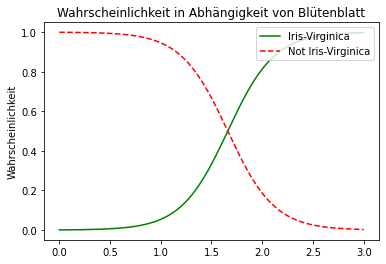

In [77]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "r--", label="Not Iris-Virginica")
plt.ylabel('Wahrscheinlichkeit')
plt.title('Wahrscheinlichkeit in Abhängigkeit von Blütenblattbreite')
plt.legend(('Iris-Virginica', 'Not Iris-Virginica'),loc='upper right')

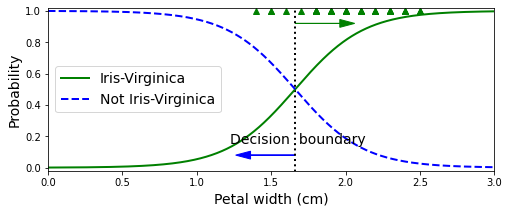

In [107]:
X_new  ==  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the _predict()_ method rather than the _predict_proba()_ method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [55]:
decision_boundary

array([ 1.61561562])

In [56]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Analog zu dem Original oben habe ich testweise das Beispiel analog für die Kelchblattbreite durchgeführt

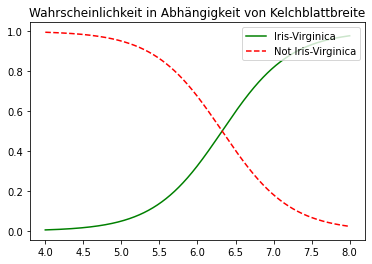

In [113]:
### Test Sandra
X_2 = iris["data"][:, 0:1] # Kelchblattbreite
log_reg_2 = LogisticRegression()
log_reg_2.fit(X_2, y)
##
X_new_2 = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba_2 = log_reg_2.predict_proba(X_new_2)
plt.plot(X_new_2, y_proba_2[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new_2, y_proba_2[:, 0], "r--", label="Not Iris-Virginica")
plt.title('Wahrscheinlichkeit in Abhängigkeit von Kelchblattbreite')
plt.legend(('Iris-Virginica', 'Not Iris-Virginica'),loc='upper right')

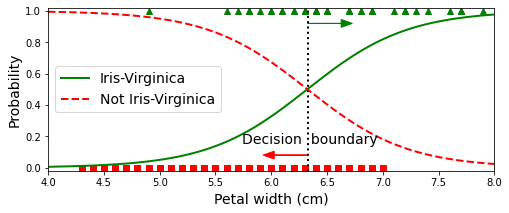

In [114]:
## Sandra Test
X_new_2  ==  np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba_2 = log_reg_2.predict_proba(X_new_2)
decision_boundary_2 = X_new_2[y_proba_2[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_2[y==0], y[y==0], "rs")
plt.plot(X_2[y==1], y[y==1], "g^")
plt.plot([decision_boundary_2, decision_boundary_2], [-1, 2], "k:", linewidth=2)
plt.plot(X_new_2, y_proba_2[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new_2, y_proba_2[:, 0], "r--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary_2+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary_2, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary_2, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])
plt.show()

## Ab hier geht das Original wieder weiter (meine Anpassungen sind markiert):

The figure below shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

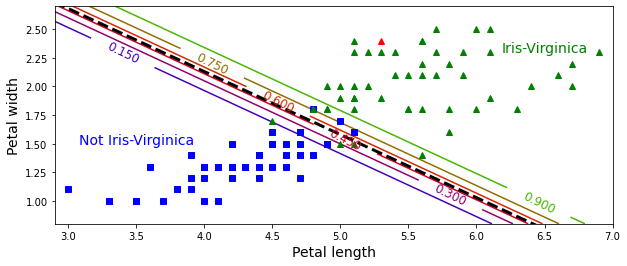

In [132]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.plot(5.3,2.4, "r^") #Aufgrund von Petal Length (all in cm) und Petal Width in der Graphic: -->Iris-Virginica
plt.show()

## Erweiterung:
Roter Punkt sind die eingegeben Werte für Petal width und Petal lenght. Somit handet es sich um eine Iris-Virginica. **Bei der Ermittlung wurde die Sepal Length und Sepal width nicht verwendet.**

## Variante 2 (Ergänzung): Statt petal length/width wird jetzt setal length/width verwendet

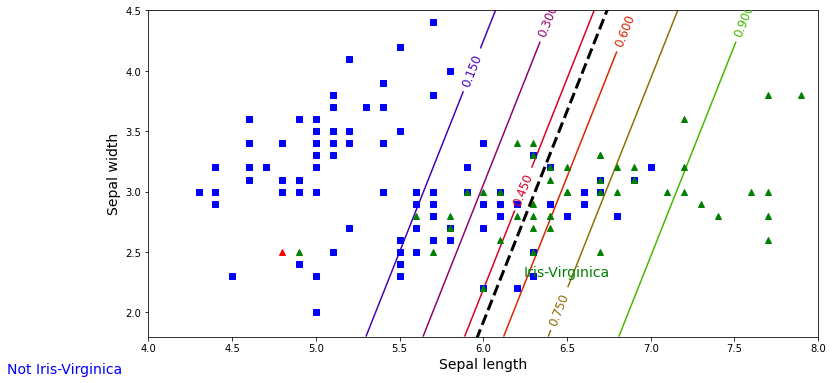

In [135]:
X_2 = iris["data"][:, (0, 1)]  # sepal length, sepal width
y_2 = (iris["target"] == 2).astype(np.int)

log_reg_2 = LogisticRegression(C=10**10, random_state=42)
log_reg_2.fit(X_2, y_2)

x0_2, x1_2 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1.8, 4.5, 200).reshape(-1, 1),
    )
X_new_2 = np.c_[x0_2.ravel(), x1_2.ravel()]

y_proba_2 = log_reg_2.predict_proba(X_new_2)

plt.figure(figsize=(12, 6))
plt.plot(X_2[y==0, 0], X_2[y==0, 1], "bs")
plt.plot(X_2[y==1, 0], X_2[y==1, 1], "g^")

zz_2 = y_proba_2[:, 1].reshape(x0_2.shape)
contour = plt.contour(x0_2, x1_2, zz_2, cmap=plt.cm.brg)


lft_rght = np.array([2.9, 7])
boundary_2 = -(log_reg_2.coef_[0][0] * lft_rght + log_reg_2.intercept_[0]) / log_reg_2.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(lft_rght, boundary_2, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.axis([4, 8, 1.8, 4.5])
plt.plot(4.8,2.5, "r^") #Aufgrund von Sepal Length (all in cm) und Sepal Width in der Graphic: -->Keine Iris-Virginica
plt.show()

## Fazit:
Während die Blütenblattlänge und -breite sich recht gut zur Unterscheidung zwischen Iris-Virginica und anderen Iris-Arten eignet, ist das Kelchblatt weniger geeignet, da die Streuung relativ hoch ist. Laut dem Kelchblatt handelt es sich wahrscheinlich nicht um eine Iris-Virginica. **Aber der rote Punkt in der Grafik liegt direkt neben einem grünen Punkt (--> Iris Virginica), da die Streuung hier recht hoch ist.**